# Student Alcohol Cunsumption
## by Nuttaphat Arunoprayoch

Student life is messy and stressful, eventually it might lead to depression. However, we all know that cracking open a cold one with your lads always helps. In this analysis, I, for no particular reasons, would like to welcome you all to dive into Alcohol Consumption by students. Enjoy :)

## Dataset

This dataset is provided and maintained by UCI. The data were obtained in a survey of students math secondary school.

In [105]:
# Data Manipulation
import pandas as pd
import numpy as np
import pandas_profiling

# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

mpl.style.use(['ggplot']) # optional: for ggplot-like style
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [140]:
# Hide Warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
# Expand to see the whole profile
pandas_profiling.ProfileReport(df)

Number of variables,33
Number of observations,395
Total Missing (%),0.0%
Total size in memory,101.9 KiB
Average record size in memory,264.2 B
Numeric,15
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B81EF12E8>,
      dtype=object)

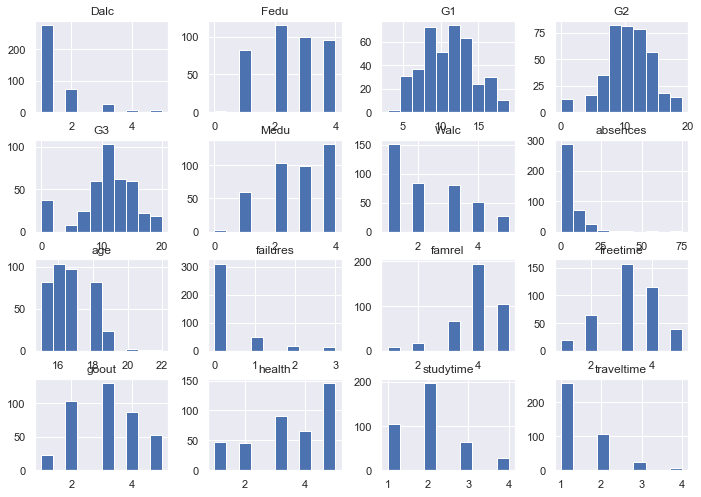

In [34]:
# Checking normal distribution
df.hist()

Even though some of data are not normalized, this is just for fun, why so serious? :)
<hr>

### Gender and Alcohol Consumption

,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


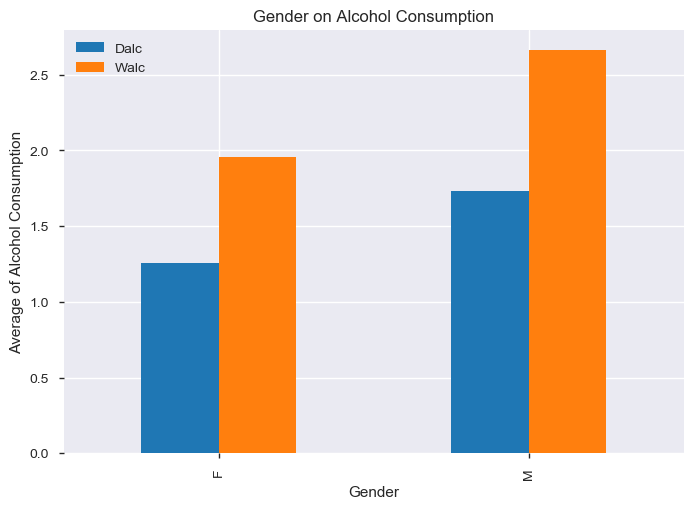

In [92]:
# Gender on Alcohol Consumption
ax = df.groupby('sex')[['Dalc', 'Walc']].mean().plot.bar()
ax.set_title('Gender on Alcohol Consumption')
ax.set_ylabel('Average of Alcohol Consumption')
ax.set_xlabel('Gender')

df.groupby('sex')[['Dalc', 'Walc']].mean().head()

As can be observed, males consumed alcohol more than female students both weekdays and weekends. But it doesn't seem significantly different.
<br>** <b>Dalc</b> - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>** <b>Walc</b> - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<hr>

### Parent's cohabitation status and Alcohol Consumption

,Dalc,Walc
Pstatus,,
A,1.560976,2.268293
T,1.471751,2.293785


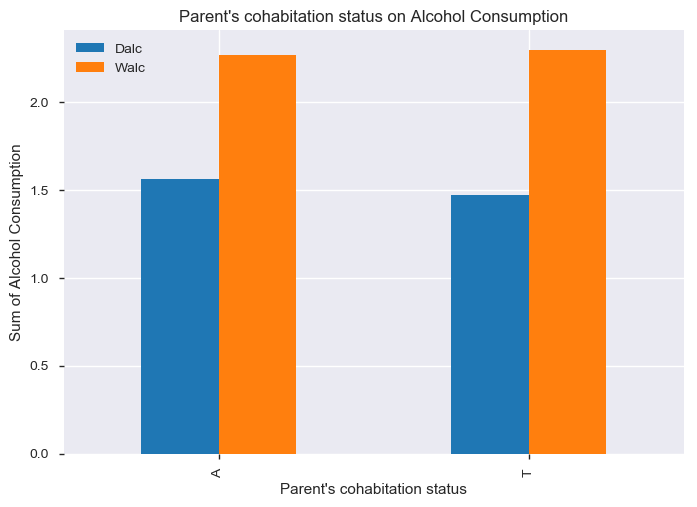

In [93]:
# Parent's cohabitation status on Alcohol Consumption

ax = df.groupby('Pstatus')[['Dalc', 'Walc']].mean().plot.bar()
ax.set_title('Parent\'s cohabitation status on Alcohol Consumption')
ax.set_ylabel('Sum of Alcohol Consumption')
ax.set_xlabel('Parent\'s cohabitation status')

df.groupby('Pstatus')[['Dalc', 'Walc']].mean().head()

By exploring Parent's cohabitation status, it was found that students whose parents were living apart (A) had a slightly higher alcohol consumption rate than the other. However, it should be noted that (A) reprents only 10% of all students, it still shows a higher rate. Therefore, it can be concluded that students whose parents were living apart comsumed alcohol significantly higher than the students whose parents were living together.
<hr>

### Guardians and Alcohol Consumption

{'father': 90, 'mother': 273, 'other': 32}


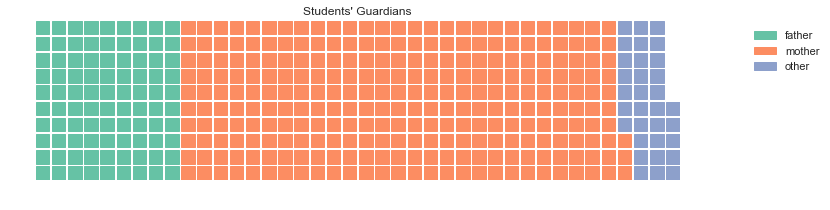

In [155]:
temp_data = df.groupby('guardian')['TotalAlc'].count()
df_gu_count = temp_data.to_dict()

ax = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=df_gu_count, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.title('Students\' Guardians')
print(df_gu_count)

According to the data collected, most of students lived with their mothers, followed by fathers and other consequently.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TotalAlc
guardian,,,,,,,,,,,,,,,,,
father,16.433333,2.655556,2.744444,1.488889,2.044444,0.277778,3.911111,3.211111,2.944444,1.533333,2.344444,3.700000,3.977778,11.111111,11.155556,10.688889,3.877778
mother,16.582418,2.831502,2.487179,1.421245,2.021978,0.267399,3.937729,3.216117,3.168498,1.450549,2.296703,3.531136,5.835165,10.882784,10.677656,10.483516,3.747253
other,18.406250,2.312500,2.187500,1.562500,2.125000,1.062500,4.093750,3.468750,3.062500,1.593750,2.093750,3.343750,9.500000,10.562500,9.781250,9.062500,3.687500


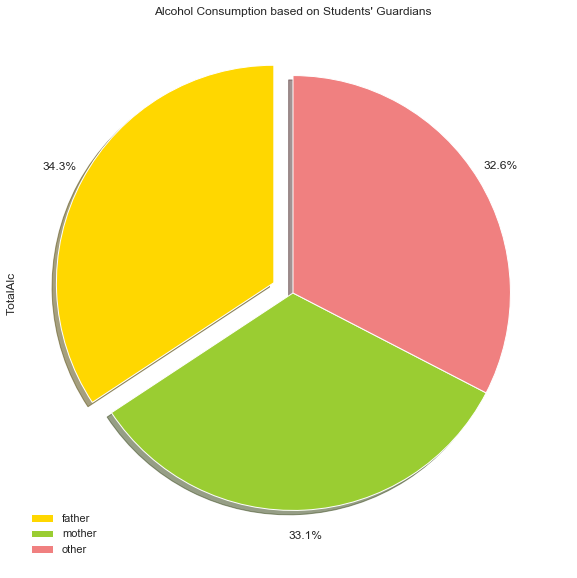

In [149]:
df_gu = df.groupby('guardian', axis=0).mean()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0] # ratio for each continent with which to offset each wedge.

ax = df_gu['TotalAlc'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list, # add custom colors
                            explode=explode_list
                            )

ax.set_title('Alcohol Consumption based on Students\' Guardians')
ax.legend(df_gu.index.tolist())
df_gu.head()

As can be observed from the pie chart depicted above, the average of alcohol consumption is almost identical. However, the students whose guardians are fathers had a slightly higher of alcohol consumption (34.3%)
<hr>

### Alcohol Consumption with Various Activities

Text(0.5, 0, 'Alcohol Consumption Levels (1-10)')

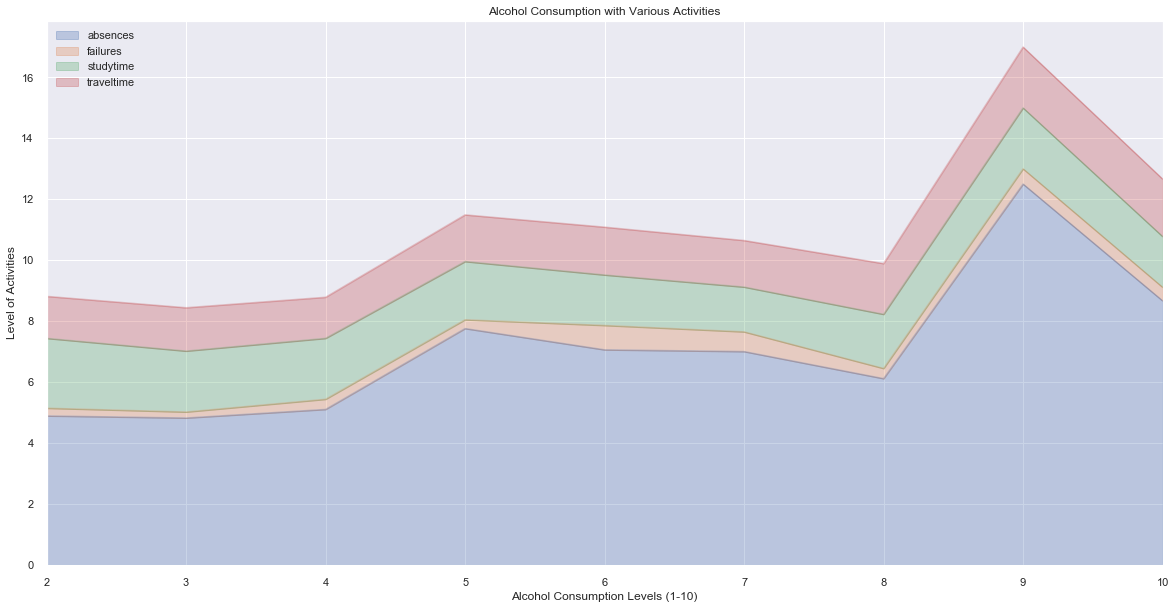

In [170]:
df_abs = df.groupby('TotalAlc')[['absences', 'failures', 'studytime', 'traveltime']].mean()

ax = df_abs.plot(kind='area', 
                 alpha=0.3, # 0-1, default value a= 0.5
                 stacked=True,
                 figsize=(20, 10),
                )

ax.set_title('Alcohol Consumption with Various Activities')
ax.set_ylabel('Level of Activities')
ax.set_xlabel('Alcohol Consumption Levels (1-10)')